# Hugging Face Models

## Text - Classification

The model performs sentiment analysis, classifying text as "NEGATIVE" with high confidence.

In [1]:
from transformers import pipeline

# Initialize pipeline
text_classification = pipeline("text-classification")

# Example
result = text_classification("It is a very sunny day")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


[{'label': 'POSITIVE', 'score': 0.9997642636299133}]


## Token Classification

The model performs token classification, identifying entities in the text, with the output showing that 'Hu' is labeled as 'I-ORG' with a confidence score of 0.59

In [8]:
from transformers import pipeline

# Initialize pipeline
token_classification = pipeline("token-classification")

# Example text
text = "Hugging Face is creating a tool that democratizes AI in New York."

# Perform token classification
results = token_classification(text)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [9]:
# Print only the first item in a simplified format
if results:
    first_result = results[0]
    # Extract relevant information from the first result
    entity = first_result.get('entity', 'No entity')
    score = first_result.get('score', 'No score')
    word = first_result.get('word', 'No word')
    start = first_result.get('start', 'No start')
    end = first_result.get('end', 'No end')

    # Print the extracted details
    print(f"Entity: {entity}")
    print(f"Score: {score:.2f}")
    print(f"Word: {word}")
    print(f"Start: {start}")
    print(f"End: {end}")
else:
    print("No results found.")

Entity: I-ORG
Score: 0.59
Word: Hu
Start: 0
End: 2


## Question Answering

The model performs question answering, providing the answer 'creating a tool that democratizes AI' from the context, with the answer starting at index 16 and ending at index 52

In [10]:
from transformers import pipeline

# Initialize pipeline
question_answering = pipeline("question-answering")

result = question_answering({
    "question": "What is Object Detection?",
    "context": "Object detection is a computer technology related to computer vision and image processing that deals with detecting instances of semantic objects of a certain class (such as humans, buildings, or cars) in digital images and videos.[1] Well-researched domains of object detection include face detection and pedestrian detection. Object detection has applications in many areas of computer vision, including image retrieval and video surveillance."
})
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.07226733863353729, 'start': 20, 'end': 89, 'answer': 'a computer technology related to computer vision and image processing'}


In [11]:
# Extract relevant information
answer = result.get('answer', 'No answer')
start = result.get('start', 'No start')
end = result.get('end', 'No end')

# Print the extracted details
print(f"Answer: {answer}")
print(f"Start: {start}")
print(f"End: {end}")

Answer: a computer technology related to computer vision and image processing
Start: 20
End: 89


## Text Generation

The model generates text extending the input prompt into a more detailed continuation.

In [12]:
from transformers import pipeline

# Initialize pipeline
text_generation = pipeline("text-generation")

# Example
result = text_generation("AI is an advance", max_length=50)
print(result)

No model was supplied, defaulted to openai-community/gpt2 and revision 6c0e608 (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'AI is an advance in computing. But the big breakthrough lies in software. Data is too big to be treated in one way or another but can be transferred all over the world, from satellites to PCs. A computer works to send information from Earth to'}]


In [13]:
result[0]['generated_text']

'AI is an advance in computing. But the big breakthrough lies in software. Data is too big to be treated in one way or another but can be transferred all over the world, from satellites to PCs. A computer works to send information from Earth to'

## Summarization

The model summarizes the text, highlighting Hugging Face's tool for simplifying access to and collaboration on machine learning models.

In [16]:
from transformers import pipeline

# Initialize pipeline
summarization = pipeline("summarization")

# Example
text = """
Object detection is a computer technology related to computer vision and image processing that deals with detecting instances of semantic objects of a certain class (such as humans, buildings, or cars) in digital images and videos.[1] Well-researched domains of object detection include face detection and pedestrian detection. Object detection has applications in many areas of computer vision, including image retrieval and video surveillance.

Uses

Detection of objects on a road
It is widely used in computer vision tasks such as image annotation,[2] vehicle counting,[3] activity recognition,[4] face detection, face recognition, video object co-segmentation. It is also used in tracking objects, for example tracking a ball during a football match, tracking movement of a cricket bat, or tracking a person in a video.

Often, the test images are sampled from a different data distribution, making the object detection task significantly more difficult.[5] To address the challenges caused by the domain gap between training and test data, many unsupervised domain adaptation approaches have been proposed.[5][6][7][8][9] A simple and straightforward solution for reducing the domain gap is to apply an image-to-image translation approach, such as cycle-GAN.[10] Among other uses, cross-domain object detection is applied in autonomous driving, where models can be trained on a vast amount of video game scenes, since the labels can be generated without manual labor.

Concept
Every object class has its own special features that help in classifying the class – for example all circles are round. Object class detection uses these special features. For example, when looking for circles, objects that are at a particular distance from a point (i.e. the center) are sought. Similarly, when looking for squares, objects that are perpendicular at corners and have equal side lengths are needed. A similar approach is used for face identification where eyes, nose, and lips can be found and features like skin color and distance between eyes can be found.

Methods

Simplified example of training a neural network in object detection: The network is trained by multiple images that are known to depict starfish and sea urchins, which are correlated with "nodes" that represent visual features. The starfish match with a ringed texture and a star outline, whereas most sea urchins match with a striped texture and oval shape. However, the instance of a ring textured sea urchin creates a weakly weighted association between them.

Subsequent run of the network on an input image (left):[11] The network correctly detects the starfish. However, the weakly weighted association between ringed texture and sea urchin also confers a weak signal to the latter from one of two intermediate nodes. In addition, a shell that was not included in the training gives a weak signal for the oval shape, also resulting in a weak signal for the sea urchin output. These weak signals may result in a false positive result for sea urchin.
In reality, textures and outlines would not be represented by single nodes, but rather by associated weight patterns of multiple nodes.
Methods for object detection generally fall into either neural network-based or non-neural approaches. For non-neural approaches, it becomes necessary to first define features using one of the methods below, then using a technique such as support vector machine (SVM) to do the classification. On the other hand, neural techniques are able to do end-to-end object detection without specifically defining features, and are typically based on convolutional neural networks (CNN).

Non-neural approaches:
Viola–Jones object detection framework based on Haar features
Scale-invariant feature transform (SIFT)
Histogram of oriented gradients (HOG) features[12]
Neural network approaches:
Region Proposals (R-CNN,[13] Fast R-CNN,[14] Faster R-CNN,[15] cascade R-CNN.[16])
Single Shot MultiBox Detector (SSD) [17]
Single-Shot Refinement Neural Network for Object Detection (RefineDet) [18]
Retina-Net [19][16]
Deformable convolutional networks [20][21]
See also
Feature detection (computer vision)
Moving object detection
Small object detection
Outline of object recognition
Teknomo–Fernandez algorithm
"""
result = summarization(text)
print(result)


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'summary_text': ' Well-researched domains of object detection include face detection and pedestrian detection . Object detection has applications in many areas of computer vision, including image retrieval and video surveillance . Cross-domain object detection is applied in autonomous driving, where models can be trained on a vast amount of video game scenes .'}]


In [17]:
result[0]['summary_text']

' Well-researched domains of object detection include face detection and pedestrian detection . Object detection has applications in many areas of computer vision, including image retrieval and video surveillance . Cross-domain object detection is applied in autonomous driving, where models can be trained on a vast amount of video game scenes .'

## Translation

Translating English text into Marathi

In [30]:
from transformers import M2M100Tokenizer, M2M100ForConditionalGeneration

# Load the M2M100 model and tokenizer
model_name = "facebook/m2m100_418M"
tokenizer = M2M100Tokenizer.from_pretrained(model_name)
model = M2M100ForConditionalGeneration.from_pretrained(model_name)

# Example English text
text = "My name is Gautami and I am a student."

# Prepare the text for the model
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

# Perform the translation
translated = model.generate(**inputs, forced_bos_token_id=tokenizer.get_lang_id("mr"))

# Decode the translated text
translated_text = tokenizer.decode(translated[0], skip_special_tokens=True)

tokenizer_config.json:   0%|          | 0.00/298 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/3.71M [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/908 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.94G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/233 [00:00<?, ?B/s]

माझे नाव गॅटमी आहे आणि मी एक विद्यार्थी आहे.


In [31]:
translated_text

'माझे नाव गॅटमी आहे आणि मी एक विद्यार्थी आहे.'

## Text-to-Text

Translating through giving Languages as input in Sentance

In [41]:
from transformers import pipeline

# Initialize the text2text-generation pipeline with the M2M100 model for translation
text2text_generation = pipeline("text2text-generation", model="facebook/m2m100_418M")

# Example text for translation
text = "My name is Gautami and I am a student."

# Perform translation from English to Indonesian
result = text2text_generation(f"translate English to Indonesian: {text}")

# Extract and print the generated text
generated_text = result[0]['generated_text']
print(generated_text)

Terjemahan Bahasa Inggris ke Bahasa Indonesia: Nama saya Gautami dan saya seorang siswa.


In [42]:
generated_text

'Terjemahan Bahasa Inggris ke Bahasa Indonesia: Nama saya Gautami dan saya seorang siswa.'

## Fill Mask

The model predicts and fills in the missing word in the text, providing a possible completion for the masked token.

In [46]:
from transformers import pipeline

# Initialize the fill-mask pipeline
fill_mask = pipeline("fill-mask")

# Example with multiple masks
sentence = "One of <mask> most important tasks in computer vision is object detection, which is locating the identifying items in an image in video."

# Perform mask filling
results = fill_mask(sentence)

# Print the results
for result in results:
    print(f"Token: {result['token_str']}")
    print(f"Score: {result['score']}")
    print()

No model was supplied, defaulted to distilbert/distilroberta-base and revision ec58a5b (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Token:  the
Score: 0.984744131565094

Token:  its
Score: 0.008222486823797226

Token:  our
Score: 0.002607866656035185

Token:  my
Score: 0.00121414999011904

Token:  their
Score: 0.000970472872722894



In [48]:
results[0]['sequence']

'One of the most important tasks in computer vision is object detection, which is locating the identifying items in an image in video.'

## Feature Extraction

The model extracts numerical features or embeddings from the input text, representing its semantic information.

In [59]:
from transformers import pipeline

# Initialize the feature-extraction pipeline
feature_extraction = pipeline("feature-extraction", model="bert-base-uncased")

# Extract features from the given text
text = "Hugging Face is creating a tool that democratizes AI."
result = feature_extraction(text)

# The result is a list of lists of vectors, where each inner list corresponds to a token
print("Feature vectors for each token:")
for i, token_features in enumerate(result[0]):
    print(f"Token {i}: {token_features[:5]}...")  # Print only the first 5 elements for brevity

# Optionally, print the entire feature vector for the first token
print("\nFull feature vector for the first token:")
print(result[0][0])


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Feature vectors for each token:
Token 0: [-0.1825380176305771, 0.08433371037244797, 0.04358568415045738, -0.06957833468914032, -0.5776285529136658]...
Token 1: [0.30635812878608704, -0.5027585625648499, 0.9039048552513123, -0.2532822787761688, -0.33547553420066833]...
Token 2: [0.26442065834999084, -0.4869498908519745, 0.6634345054626465, -0.20981962978839874, 0.6741081476211548]...
Token 3: [-0.10485835373401642, 0.17790327966213226, 0.07797825336456299, -0.27660784125328064, 0.23061741888523102]...
Token 4: [-0.25613802671432495, -0.3360314667224884, 0.1282106190919876, 0.2689763903617859, 0.22617916762828827]...
Token 5: [-0.5730352401733398, -0.33227863907814026, 0.5262641310691833, 0.41452541947364807, 0.33774977922439575]...
Token 6: [-0.2957105040550232, -0.2797950208187103, 0.5795286893844604, 0.4117985665798187, 0.5138311982154846]...
Token 7: [-0.7999933958053589, -0.4737921357154846, 0.49074381589889526, 0.20632170140743256, 0.6273272037506104]...
Token 8: [-0.74978554248809

## Image Classification

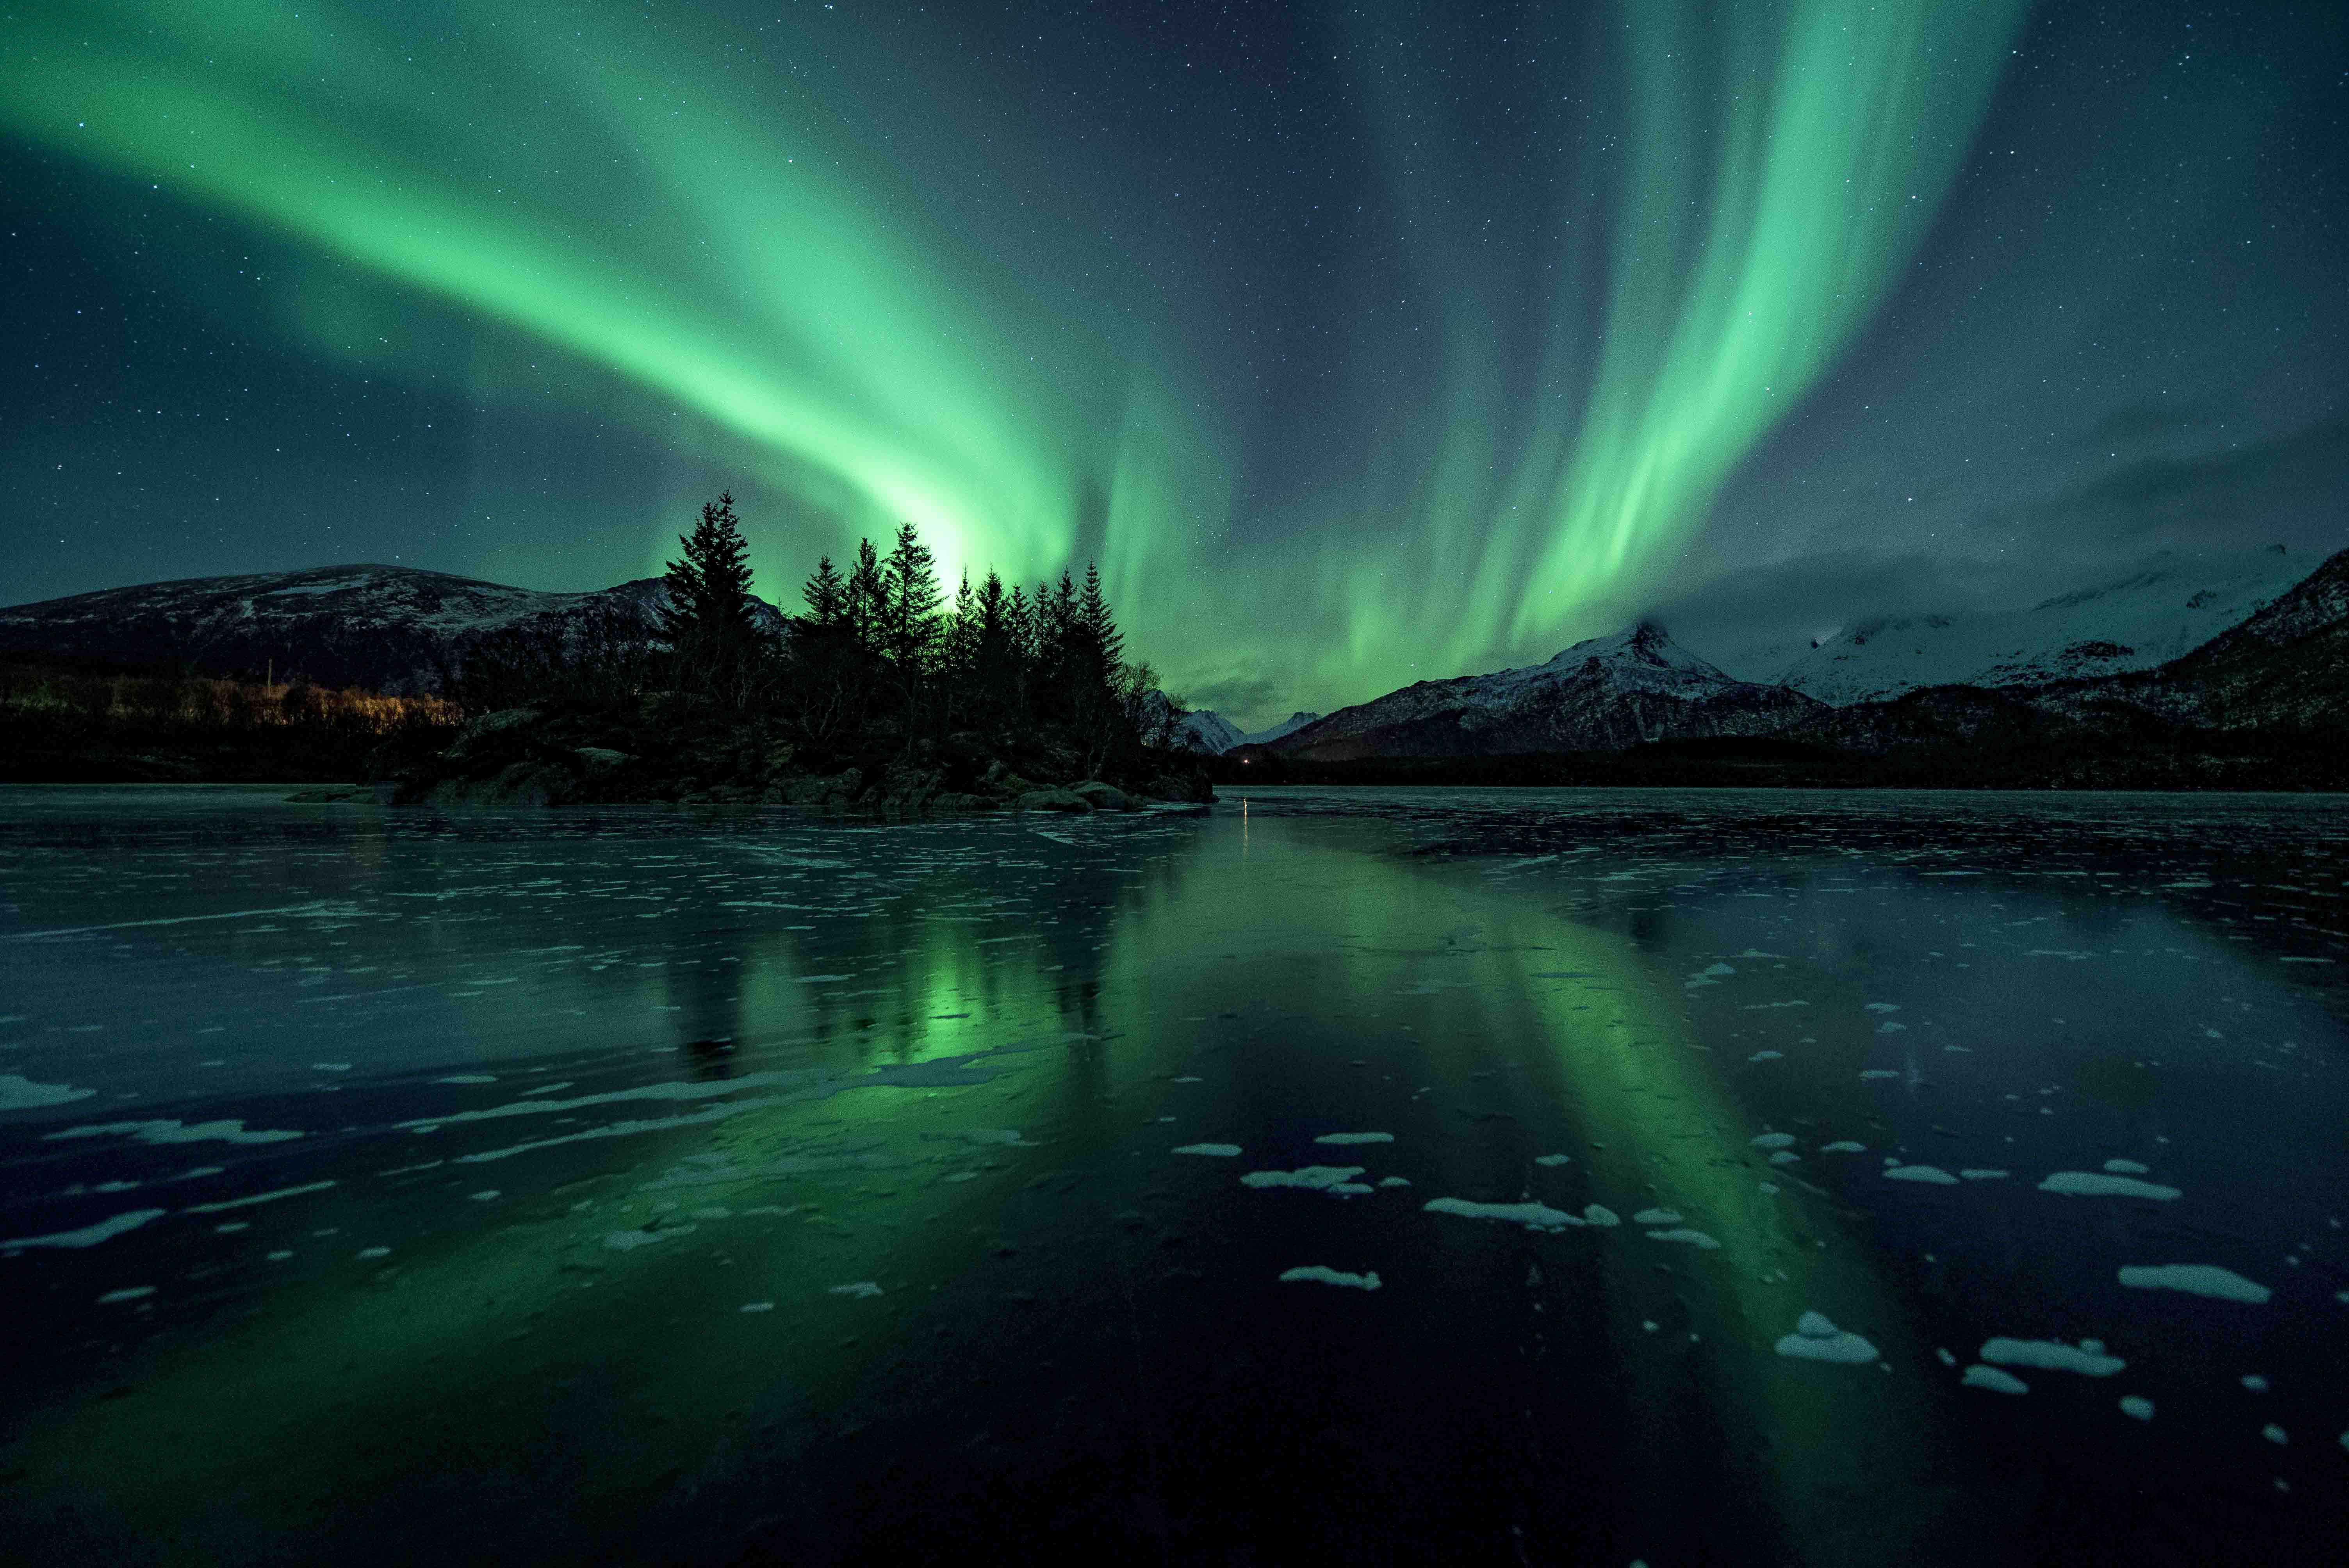

The model classifies the input image into predefined categories or labels based on its content.

In [60]:
from transformers import pipeline
from PIL import Image

# Initialize pipeline
image_classification = pipeline("image-classification")

# Example
image = Image.open("/content/drive/MyDrive/SEM 3/NLP/Practicals/Aurora-Lights-iceland-s-copy.jpg")
result = image_classification(image)
print(result)

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


[{'label': 'fountain', 'score': 0.41377609968185425}, {'label': 'lakeside, lakeshore', 'score': 0.09112580865621567}, {'label': 'spotlight, spot', 'score': 0.050455763936042786}, {'label': 'planetarium', 'score': 0.04041982814669609}, {'label': 'geyser', 'score': 0.032909590750932693}]


In [61]:
# Print only the labels from the result
print("Labels:")
for item in result:
    print(item['label'])

Labels:
fountain
lakeside, lakeshore
spotlight, spot
planetarium
geyser


## Object Detection

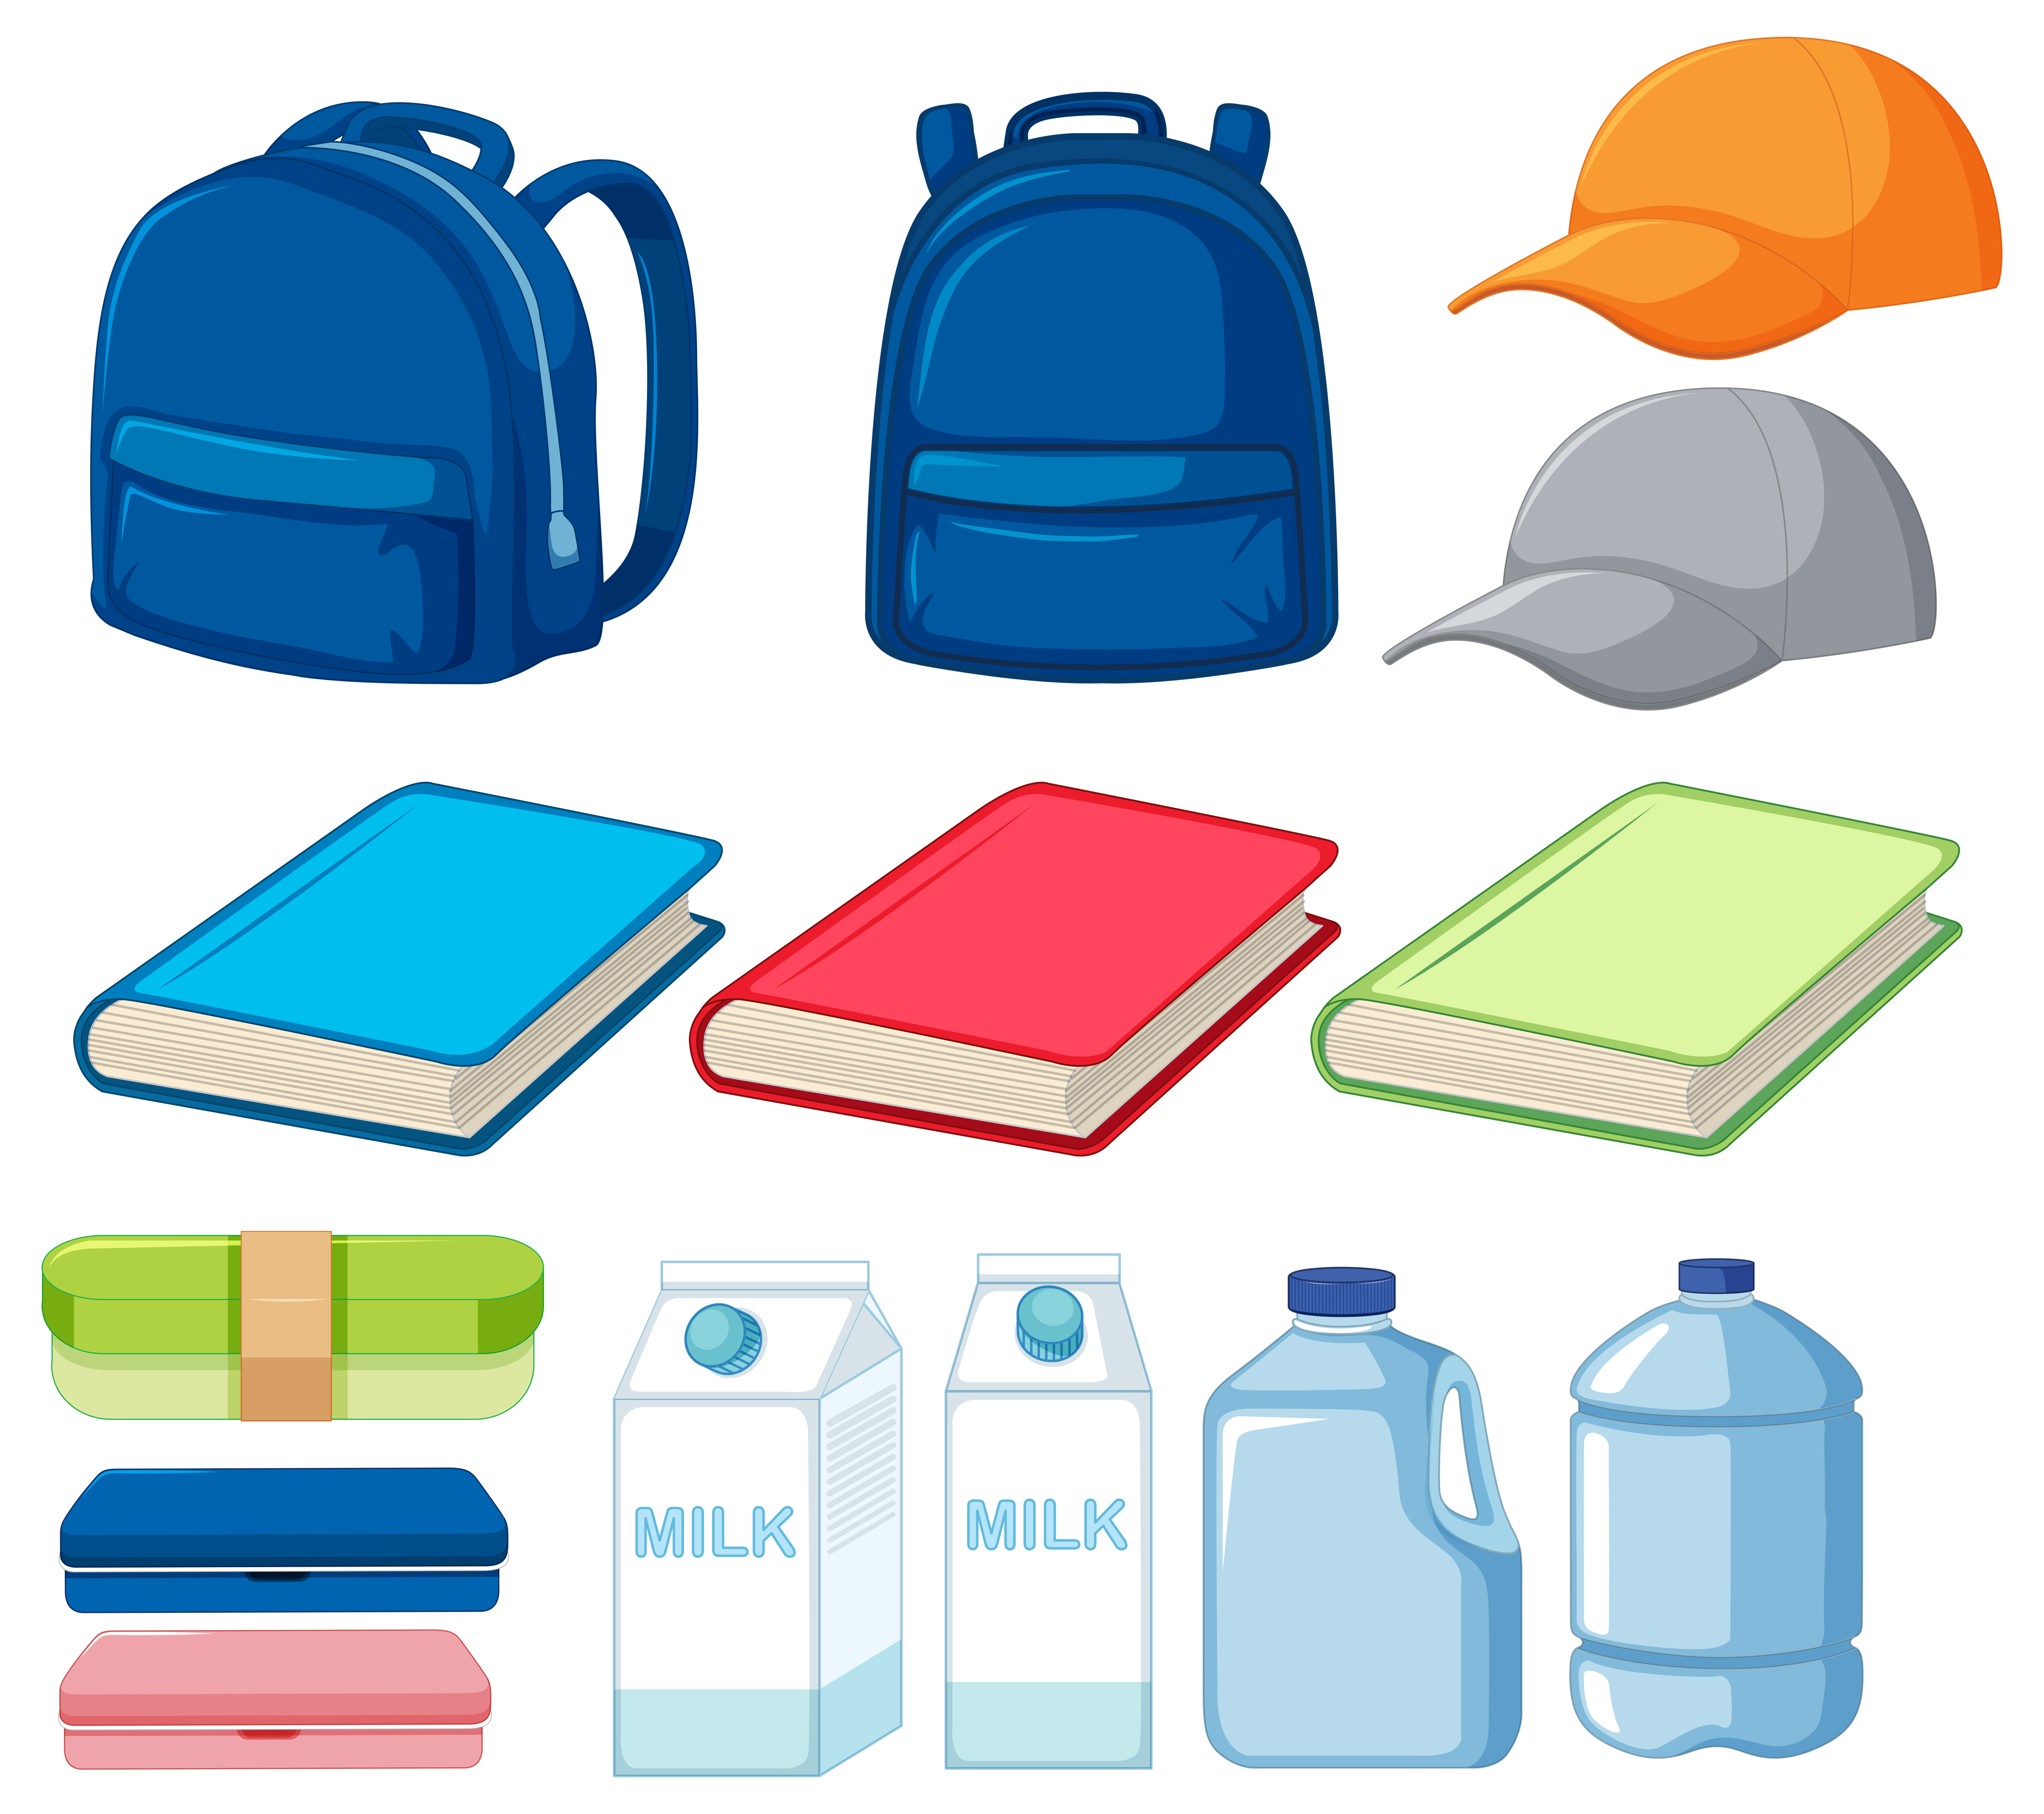

The model identifies and locates objects within an image by providing bounding boxes and class labels for each detected object.

In [19]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [64]:
from transformers import pipeline
from PIL import Image

# Initialize the object detection pipeline with a different model
object_detection = pipeline("object-detection", model="hustvl/yolos-tiny")

# Load the image
image_path = "/content/drive/MyDrive/SEM 3/NLP/Practicals/set-of-many-objects-vector.jpg"
image = Image.open(image_path)

# Perform object detection
results = object_detection(image)

# Print results
print("Detection results:")
print(results)


Detection results:
[{'score': 0.5280617475509644, 'label': 'handbag', 'box': {'xmin': 2093, 'ymin': 233, 'xmax': 3245, 'ymax': 1652}}, {'score': 0.933223307132721, 'label': 'bottle', 'box': {'xmin': 3790, 'ymin': 3072, 'xmax': 4555, 'ymax': 4300}}, {'score': 0.9675556421279907, 'label': 'bottle', 'box': {'xmin': 2916, 'ymin': 3082, 'xmax': 3677, 'ymax': 4319}}, {'score': 0.5666155815124512, 'label': 'handbag', 'box': {'xmin': 188, 'ymin': 255, 'xmax': 1727, 'ymax': 1694}}]


In [66]:
# Print only the labels from the result
print("Labels:")
for item in results:
    print(item['label'])

Labels:
handbag
bottle
bottle
handbag


## Image Segmentation(Not Working)

In [8]:
!pip install transformers

In [21]:
pip install transformers pillow

In [24]:
from transformers import pipeline
from PIL import Image, ImageDraw
import numpy as np

# Initialize the image segmentation pipeline with the model
try:
    image_segmentation = pipeline("image-segmentation", model="facebook/detr-resnet-50")
except Exception as e:
    print(f"Error initializing the pipeline: {e}")
    image_segmentation = None

# Load the image from the specified path
image_path = "/content/drive/MyDrive/SEM 3/NLP/Practicals/set-of-many-objects-vector.jpg"
image = Image.open(image_path)

# Perform image segmentation
if image_segmentation:
    try:
        results = image_segmentation(image)
    except Exception as e:
        print(f"Error performing image segmentation: {e}")
        results = []
else:
    results = []

# Check if results are not empty
if results:
    # Draw segmentation masks on the image
    draw = ImageDraw.Draw(image)
    for result in results:
        mask = result['mask']
        label = result['label']
        score = result['score']

        # Convert mask to PIL image
        mask_image = Image.fromarray(np.array(mask) * 255).convert("RGBA")

        # Create a new image for the mask
        color_mask = Image.new("RGBA", image.size)
        color_mask.paste(mask_image, (0, 0), mask_image)

        # Blend the original image with the color mask
        image = Image.blend(image.convert("RGBA"), color_mask, alpha=0.5)

        # Draw the label and score
        draw.text((10, 10), f"{label} ({score:.2f})", fill="red")

    # Display the image with segmentation
    image.show()

    # Print segmentation results
    print("Segmentation results:")
    for result in results:
        print(f"Label: {result['label']}")
        print(f"Confidence: {result['score']:.2f}")
        print(f"Mask shape: {np.array(result['mask']).shape}")
        print()
else:
    print("No results returned from the segmentation pipeline.")

Some weights of DetrForSegmentation were not initialized from the model checkpoint at facebook/detr-resnet-50 and are newly initialized: ['model.bbox_attention.k_linear.bias', 'model.bbox_attention.k_linear.weight', 'model.bbox_attention.q_linear.bias', 'model.bbox_attention.q_linear.weight', 'model.detr.bbox_predictor.layers.0.bias', 'model.detr.bbox_predictor.layers.0.weight', 'model.detr.bbox_predictor.layers.1.bias', 'model.detr.bbox_predictor.layers.1.weight', 'model.detr.bbox_predictor.layers.2.bias', 'model.detr.bbox_predictor.layers.2.weight', 'model.detr.class_labels_classifier.bias', 'model.detr.class_labels_classifier.weight', 'model.detr.model.backbone.conv_encoder.model.bn1.bias', 'model.detr.model.backbone.conv_encoder.model.bn1.running_mean', 'model.detr.model.backbone.conv_encoder.model.bn1.running_var', 'model.detr.model.backbone.conv_encoder.model.bn1.weight', 'model.detr.model.backbone.conv_encoder.model.conv1.weight', 'model.detr.model.backbone.conv_encoder.model.la

No results returned from the segmentation pipeline.


## Speech Recognition

The model transcribes spoken words from an audio file into written text.

In [29]:
pip install tensorflow librosa numpy pandas scikit-learn

In [67]:
from transformers import pipeline

# Initialize the automatic speech recognition pipeline
speech_to_text = pipeline("automatic-speech-recognition")

# Path to the audio file
audio_file_path = "/content/drive/MyDrive/SEM 3/NLP/Practicals/mixkit-dog-barking-twice-1.wav"

# Perform speech-to-text conversion
result = speech_to_text(audio_file_path)

# Print the transcribed text
print(result['text'])

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 55bb623 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebo

OH OH


In [68]:
# Print the transcribed text
print(result['text'])

OH OH
